**TUGAS 4 EB4011 PENGENALAN POLA (NUR SEKTI WASKITHA JATI / 18318023)**

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FL3YgLnhMIPAajat2vUzQTrcnQ8wDAoOdZfamQ99BBI/edit?usp=sharing')

In [ ]:
sheet = wb.worksheet('Sheet1')
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
print(df.shape)
df.head()

(447, 13)


,Nama Mata Kuliah,Jumlah SKS,Nilai,Jenis kelamin mahasiswa,"Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)","Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)","Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)",Komponen Nilai,Pelaksanaan kuliah,Lama belajar per minggu,Total SKS yang diambil saat mengambil kuliah ini,"Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)","Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)"
1,Fisika Dasar IA,4,AB,Perempuan,4,3,4,"Ada Kuis, Ada Tubes, Ada UTS",Luring,3,18,4,3
2,Matematika IA,4,B,Perempuan,4,3,4,"Ada PR, Ada Kuis, Ada UTS, Ada UAS",Luring,4,18,2,3
3,Pengenalan Teknologi Informasi B,2,AB,Perempuan,4,5,4,"Ada Kuis, Ada Tubes, Ada UTS, Ada UAS",Luring,2,18,4,4
4,Tata Tulis Karya Ilmiah,2,BC,Perempuan,4,2,3,"Ada Kuis, Ada Tubes, Ada UTS, Ada UAS",Luring,1,18,3,2
5,Dasar Pemrograman,2,AB,Perempuan,4,5,4,"Ada PR, Ada Kuis, Ada Tubes, Ada UTS, Ada UAS",Luring,3,18,4,4


Kode di atas ditujukan untuk mengambil data spreadsheet yang tersimpan di drive. Data berbentuk tabel dengan ukuran 447 x 13 yang berisi tipe data campuran antara nominal, ordinal, dan numerik.

**CLASSIFIER CONVENSIONAL**

In [ ]:
df.loc[df['Nilai']=='E']

,Nama Mata Kuliah,Jumlah SKS,Nilai,Jenis kelamin mahasiswa,"Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)","Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)","Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)",Komponen Nilai,Pelaksanaan kuliah,Lama belajar per minggu,Total SKS yang diambil saat mengambil kuliah ini,"Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)","Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)"
121,Pengantar Analisis Rangkaian,2,E,Perempuan,3,4,1,"Ada PR, Ada Kuis, Ada UTS, Ada UAS",Luring,3,18,3,2


In [ ]:
df.loc[df['Nilai']=='D']

,Nama Mata Kuliah,Jumlah SKS,Nilai,Jenis kelamin mahasiswa,"Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)","Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)","Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)",Komponen Nilai,Pelaksanaan kuliah,Lama belajar per minggu,Total SKS yang diambil saat mengambil kuliah ini,"Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)","Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)"
78,Probabilitas dan Biostatistika,3,D,Laki-laki,5,1,2,"Ada Kuis, Ada UTS, Ada UAS","Daring sinkron, Daring asinkron (video saja)",7,23,4,1
375,Kimia Dasar IIB,2,D,Laki-laki,4,2,2,"Ada PR, Ada Kuis, Ada UTS, Ada UAS",Luring,2,18,2,2
387,Sistem Digital dan Mikroprosesor,4,D,Perempuan,4,1,1,"Ada Kuis, Ada Tubes, Ada UTS, Ada UAS",Luring,3,19,4,1


In [ ]:
df.loc[df['Nilai']=='C']

,Nama Mata Kuliah,Jumlah SKS,Nilai,Jenis kelamin mahasiswa,"Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)","Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)","Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)",Komponen Nilai,Pelaksanaan kuliah,Lama belajar per minggu,Total SKS yang diambil saat mengambil kuliah ini,"Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)","Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)"
9,Elektronika Biomedika,3,C,Perempuan,4,2,2,"Ada PR, Ada Kuis, Ada UTS, Ada UAS","Luring, Daring sinkron",3,20,4,2
88,Pengantar Analisis Rangkaian,2,C,Laki-laki,5,4,4,"Ada PR, Ada Kuis, Ada UTS, Ada UAS",Luring,7,18,3,3
91,Matematika IIA,4,C,Laki-laki,5,1,2,"Ada PR, Ada Kuis, Ada UTS, Ada UAS",Luring,7,18,2,1
377,Elektronika Biomedika,3,C,Laki-laki,3,3,3,"Ada PR, Ada Kuis, Ada UTS, Ada UAS","Luring, Daring sinkron",3,20,3,2
381,Matematika 1A,4,C,Perempuan,2,2,3,"Ada PR, Ada Kuis, Ada UTS, Ada UAS",Luring,8,16,1,1
384,Matematika IIA,4,C,Laki-laki,3,3,3,"Ada PR, Ada Kuis, Ada UTS, Ada UAS",Luring,2,18,3,3
388,"Sinyal, Sistem, dan Kontrol",4,C,Laki-laki,4,3,3,"Ada PR, Ada Kuis, Ada UTS, Ada UAS","Luring, Daring sinkron",2,20,3,3
392,Pemecahan Masalah dengan C,3,C,Laki-laki,3,3,3,"Ada PR, Ada UTS, Ada UAS",Luring,2,20,3,3
438,Matematika Rekayasa IIA,3,C,Perempuan,2,3,2,"Ada PR, Ada Kuis, Ada UTS, Ada UAS",Daring sinkron,3,20,4,2


Dari eksplorasi data, diperoleh bahwa yang mendapat nilai E hanya 1 orang dengan indikator "pemahaman" = 1. Untuk yang mendapat nilai D ada 3 orang dan tidak ada yang memberikan nilai lebih dari 2 pada kolom "pemahaman" dan "minat". Untuk nilai lainnya sangat bervariasi.

In [ ]:
def predictManual(df):
  minat = int(df['Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)'])
  paham = int(df['Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)'])

  if(paham==1):
    return 'E'
  elif(paham==2 or minat==2):
    return 'D'
  elif(paham<3 or minat<3):
    return 'C'
  elif((paham>=3 and paham<=4) and (minat>=3 and minat<=4)):
    return 'B'
  elif(paham>=4 or minat>=4):
    return 'A'
  elif(paham!=5):
    return 'AB'
  else:
    return 'BC'

row, col = df.shape
count = 0
for i in range(row):
  df1 = df.loc[i+1]
  pred = predictManual(df1)
  if(pred==df1['Nilai']):
    count += 1

print("Akurasi = ", count/row)

Akurasi =  0.30648769574944074


Model yang dibuat berdasarkan pengamatan manual ini memberikan akurasi sekitar 30%. Akurasi ini cukup rendah karena data sangat beragam dan banyak sehingga pengamatan manual oleh manusia menghasilkan hasil yang kurang kurang maksimal.

**PREPROCESSING DATA**

In [ ]:
PR = df['Komponen Nilai'].str.contains("Ada PR")
Kuis = df['Komponen Nilai'].str.contains("Ada Kuis")
Tubes = df['Komponen Nilai'].str.contains("Ada Tubes")
UTS = df['Komponen Nilai'].str.contains("Ada UTS")
UAS = df['Komponen Nilai'].str.contains("Ada UAS")
luring = df['Pelaksanaan kuliah'].str.contains("Luring")
daringsin = df['Pelaksanaan kuliah'].str.contains("Daring sinkron")
daringasin = df['Pelaksanaan kuliah'].str.contains("Daring asinkron (video saja)")

del df['Komponen Nilai']
del df['Nama Mata Kuliah']
del df['Pelaksanaan kuliah']
df.insert(6, "Ada PR", PR)
df.insert(7, "Ada Kuis", Kuis)
df.insert(8, "Ada Tubes", Tubes)
df.insert(9, "Ada UTS", UTS)
df.insert(10, "Ada UAS", UAS)
df.insert(11, "Luring", luring)
df.insert(12, "Daring sinkron", daringsin)
df.insert(13, "Daring asinkron (video saja)", daringasin)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Jumlah SKS,Nilai,Jenis kelamin mahasiswa,"Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)","Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)","Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)",Ada PR,Ada Kuis,Ada Tubes,Ada UTS,Ada UAS,Luring,Daring sinkron,Daring asinkron (video saja),Lama belajar per minggu,Total SKS yang diambil saat mengambil kuliah ini,"Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)","Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)"
1,4,AB,Perempuan,4,3,4,False,True,True,True,False,True,False,False,3,18,4,3
2,4,B,Perempuan,4,3,4,True,True,False,True,True,True,False,False,4,18,2,3
3,2,AB,Perempuan,4,5,4,False,True,True,True,True,True,False,False,2,18,4,4
4,2,BC,Perempuan,4,2,3,False,True,True,True,True,True,False,False,1,18,3,2
5,2,AB,Perempuan,4,5,4,True,True,True,True,True,True,False,False,3,18,4,4


Dalam kode di atas dilakukan pemisahan data dalam satu kolom karena pada kolom 'pelaksanaan kuliah' dan 'komponen nilai' berisi lebih dari satu informasi. setelah dipisah, kolom aslinya dihapus. Kolom yang baru diisi dengan boolean true false untuk menunjukkan ada atau tidaknya data dalam baris yang bersangkutan. Selain itu juga dilakukan penghapusan kolom nama mata kuliah karena akan dilihat pengaruh parameter-parameter selain nama mata kuliah terhadap nilai yang didapat mahasiswa.

In [ ]:
row, col = df.shape

col_name = df.columns.tolist()
col_new = []
col_new.append(col_name[0])
for i in range(col-2):
  col_new.append(col_name[i+2])
col_new.append(col_name[1])

df = df[col_new]
df.head()

,Jumlah SKS,Jenis kelamin mahasiswa,"Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)","Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)","Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)",Ada PR,Ada Kuis,Ada Tubes,Ada UTS,Ada UAS,Luring,Daring sinkron,Daring asinkron (video saja),Lama belajar per minggu,Total SKS yang diambil saat mengambil kuliah ini,"Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)","Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)",Nilai
1,4,Perempuan,4,3,4,False,True,True,True,False,True,False,False,3,18,4,3,AB
2,4,Perempuan,4,3,4,True,True,False,True,True,True,False,False,4,18,2,3,B
3,2,Perempuan,4,5,4,False,True,True,True,True,True,False,False,2,18,4,4,AB
4,2,Perempuan,4,2,3,False,True,True,True,True,True,False,False,1,18,3,2,BC
5,2,Perempuan,4,5,4,True,True,True,True,True,True,False,False,3,18,4,4,AB


Karena kita ingin menjadikan komponen nilai sebagai output dan komponen lainnya sebagai input, maka di kode ini dilakukan pemindahan kolom nilai ke ujung paling kanan untuk memudahkan dalam pengamatan.

In [ ]:
class_le = LabelEncoder()
gender = class_le.fit_transform(df['Jenis kelamin mahasiswa'].values)
nilai = class_le.fit_transform(df['Nilai'].values)

df['Jenis kelamin mahasiswa'] = gender
df['Nilai'] = nilai
df.head()

,Jumlah SKS,Jenis kelamin mahasiswa,"Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)","Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)","Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)",Ada PR,Ada Kuis,Ada Tubes,Ada UTS,Ada UAS,Luring,Daring sinkron,Daring asinkron (video saja),Lama belajar per minggu,Total SKS yang diambil saat mengambil kuliah ini,"Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)","Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)",Nilai
1,4,1,4,3,4,False,True,True,True,False,True,False,False,3,18,4,3,1
2,4,1,4,3,4,True,True,False,True,True,True,False,False,4,18,2,3,2
3,2,1,4,5,4,False,True,True,True,True,True,False,False,2,18,4,4,1
4,2,1,4,2,3,False,True,True,True,True,True,False,False,1,18,3,2,3
5,2,1,4,5,4,True,True,True,True,True,True,False,False,3,18,4,4,1


Komputer tidak bisa mengolah data yang berbentuk ordinal atau nominal (hanya data numerik yang bisa diolah), maka dilakukan pengkodean terhadap data-data tersebut. Pengkodean tersebut akan konsisten sehingga data dengan nama yang sama akan dikodekan dengan angka yang sama. Untuk data boolean tidak perlu dikodekan karena "false" bernilai 0 dan "true" bernilai 1 (otomatis berubah menjadi numerik ketika diolah)

In [ ]:
x = df.loc[:, 'Jumlah SKS':'Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)']
y = df.loc[:, 'Nilai']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)

In [ ]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

Sebelum melakukan training, dilakukan pemisahan antara data yang akan dijadikan data latih dan data tes. Dalam kode ini, data training berisi 70% data dan data tes berisi 30% data. Selain itu juga dilakukan standardisasi terhadap data untuk menyeragamkan skala data. Dalam kode ini digunakan scaler standard.

**BERBAGAI PENDEKATAN MACHINE LEARNING**

**Algoritma Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0)
ppn.fit(x_train_std, y_train)

y_pred = ppn.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 89
Accuracy: 0.34


Pada model algoritma perceptron diperoleh akurasi yang sedikit lebih tinggi daripada model prediksi manual sebelumnya, walau keduanya masih tergolong rendah. Algoritma ini memanfaatkan prinsip mencari bobot-bobot yang sesuai untuk setiap input berdasarkan learning rate dan jumlah epochnya. Hasil yang diperoleh tergolong yang paling rendah jika dibandingkan dengan algoritma lainnya.

**Algoritma Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, random_state=0)
lr.fit(x_train_std, y_train)
y_pred = lr.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 68
Accuracy: 0.50


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pada model logistic reggression terjadi peningkatan akurasi. Hal tersebut karena algoritma ini lebih cocok digunakan untuk mengolah data yang lebih beragam (fungsi aktivasi yang lebih fleksibel) dan hasilnya pun relatif lebih baik daripada algoritma perceptron.

**Algoritma SVM**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(x_train_std, y_train)
y_pred = svm.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 66
Accuracy: 0.51


Algoritma SVM ini merupakan pengembangan dari perceptron dengan cara mengoptimalkan margin yang ada, yaitu arak antara decision boundary (hyperplane pemisah) yang memisahkan dua region dan sampel data latih terdekat dari hyperplane. Diperoleh hasilnya pun lebih tinggi daripada perceptron dan hampir sama dengan logistic regresion. 

**Algoritma SVM dengan Gamma**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=1.0)
svm.fit(x_train_std, y_train)
y_pred = svm.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 62
Accuracy: 0.54


Dengan penambahan gamma yang merupakan parameter cut off dalam gaussian tentunya akan menaikkan akurasi (umum pada berbagai macam data). Namun peningkatannya pun tidak signifikan dari SVM yang biasa.

**Algoritma Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 63
Accuracy: 0.53


Algoritma ini memanfaatkan nilai threshold dengan banyak case yang dijadikan acuan untuk menentukan keputusan klasifikasi. Hasil yang diperoleh pun cukup tidak jauh berbeda dengan logistic regression dan SVM.

**Algoritma Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(x_train_std, y_train)
y_pred = forest.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 68
Accuracy: 0.50


Umumnya algoritma ini cukup powerful dalam berbagai kasus, namun nampaknya akibat data yang sangat beragam pada data, tidak diperoleh peningkatan akurasi jika dibandingkan dengan decision tree. Fitur-fitur yang kurang penting dan dijadikan input membuat random forest kurang optimal jika langsung digunakan.

**Algoritma KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2, p=7, metric='minkowski')
knn.fit(x_train_std, y_train)
y_pred = knn.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 64
Accuracy: 0.53


Algoritma KNN menghaislkan akurasi yang tidak jauh berbeda dari algoritma lainnnya. Walaupun menggunakan pendekatan yang berbeda, namun KNN tidak kalah jika dibandingkan dengan algoritma-algoritma lainnya. Terutama untuk data yang sangat variatif ini, algoritma KNN bisa mengimbangi akurasi algoritma lainnya.

**SELECTION FEATURES (SBS & RANDOM FOREST)**

**Seleksi Fitur SBS**

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 
                 ,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, x, y):
        
        x_train, x_test, y_train, y_test = \
            train_test_split(x, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(x_train, y_train, 
                                 x_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(x_train, y_train, 
                                         x_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, x):
        return x[:, self.indices_]

    def _calc_score(self, x_train, y_train, x_test, y_test, indices):
        self.estimator.fit(x_train[:, indices], y_train)
        y_pred = self.estimator.predict(x_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

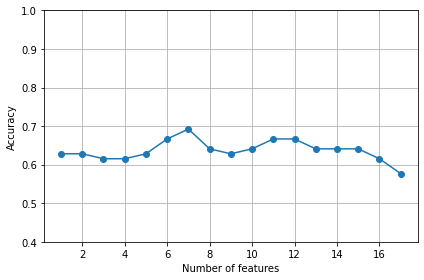

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(x_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.4, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

Dengan menggunakan sistem SBS untuk mencari fitur-fitur penting, diperoleh hasl yang cukup seimbang antara semua jumlah fitur. Fitur dengan akurasi tertinggi adalah 7 fitur dengan akurasi hampir 70%.

In [ ]:
k7 = list(sbs.subsets_[10])
print(df.columns[0:][k7])
df[df.columns[k7]]

Index(['Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)',
       'Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)',
       'Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)',
       'Ada Tubes', 'Daring sinkron', 'Lama belajar per minggu',
       'Total SKS yang diambil saat mengambil kuliah ini'],
      dtype='object', name=0)


,"Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)","Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)","Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)",Ada Tubes,Daring sinkron,Lama belajar per minggu,Total SKS yang diambil saat mengambil kuliah ini
1,4,3,4,True,False,3,18
2,4,3,4,False,False,4,18
3,4,5,4,True,False,2,18
4,4,2,3,True,False,1,18
5,4,5,4,True,False,3,18
...,...,...,...,...,...,...,...
443,3,1,3,False,True,4,23
444,2,2,4,False,True,3,24
445,2,3,3,False,True,3,24
446,2,4,4,True,True,5,24


komponen di atas merupakan 7 komponen terpenting yang paling berpengaruh dalam klasifikasi berdasarkan sistem SBS. terlihat bahwa tingkat pemahaman dan tingkat ketertarikan yang sudah diprediksi secara manual sebagai fitur penting (pada algoritma konvensional) memang benar merupakan fitur yang berpengaruh dalam penentuan nilai mahasiswa. Algoritma ini mencoba satu per satu fitur yang dikombinasikan dengan fitur-fitur lainnya lalu diambil yang terbaik, menghasilkan akurasi tertinggi tiap masing-masing pengelompokannya.

In [ ]:
knn.fit(x_train_std[:, k7], y_train)
print('Training accuracy:', knn.score(x_train_std[:, k7], y_train))
print('Test accuracy:', knn.score(x_test_std[:, k7], y_test))

Training accuracy: 0.6506410256410257
Test accuracy: 0.45185185185185184


In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import display

clf = tree.DecisionTreeClassifier()
clf = clf.fit(df[df.columns[k7]], df['Nilai'])
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=df.columns[0:][k7])  
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

Output hidden; open in https://colab.research.google.com to view.

Dengan 7 fitur penting yang digunakan, bisa menghasilkan akurasi training 65% dan akurasi tes 45%. Akurasi ini tidak jauh berbeda dari algoritma-algoritma sebelumnya, malah cenderung menurun. Hal tersebut mungkin diakibatkan data yang kurang representatif atau memang tidak ada korelasi pasti antara input dengan output. Terlihat juga decision tree yang cukup kompleks akibat menggunakan 7 fitur penting dalam klasifikasinnya. 

**Seleksi Fitur Random Forest**

 1) Total SKS yang diambil saat mengambil kuliah ini 0.133952
 2) Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke) 0.127558
 3) Ada PR                         0.099212
 4) Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik) 0.089170
 5) Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham) 0.088825
 6) Nilai                          0.087711
 7) Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat) 0.077090
 8) Jenis kelamin mahasiswa        0.059839
 9) Ada Tubes                      0.040598
10) Ada UTS                        0.038448
11) Ada Kuis                       0.037421
12) Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk) 0.034995
13) Daring asinkron (video saja)   0.028115
14) Daring sinkron                 0.025358
15) Luring                         0.019587
16) Ada UAS                        0.012121
17) Lama belajar 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


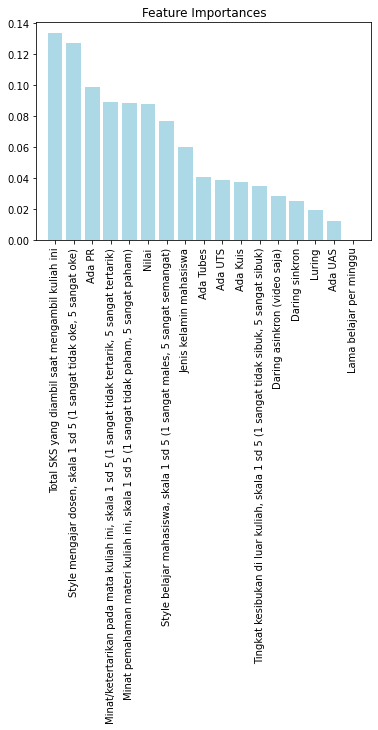

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(x_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(x_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.09, prefit=True)
X_selected = sfm.transform(x_train)

X_selected.shape

(312, 3)

In [ ]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Total SKS yang diambil saat mengambil kuliah ini 0.133952
 2) Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke) 0.127558
 3) Ada PR                         0.099212


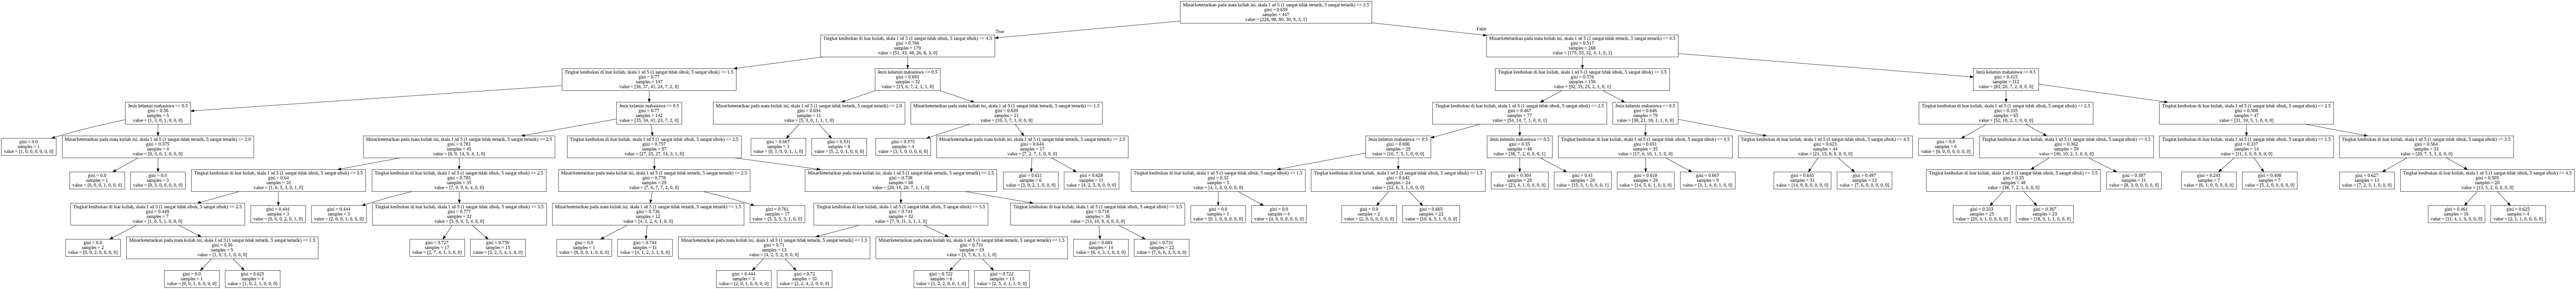

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import display

clf = tree.DecisionTreeClassifier()
clf = clf.fit(df[feat_labels[:X_selected.shape[1]]], df['Nilai'])
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feat_labels[:X_selected.shape[1]])  
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

Dari seleksi fitur menggunakan random forest ini diperoleh urutan fitur-fitur yang paling berpengaruh dalam penentuan output nilai mahasiswa. Algoritma ini sama dengan sebelumya, yaitu menerapkan beberapa decision tree dan dilakukan vote terhadap semua hasil yang tersedia untuk menentukan outputnya. Hanya saja dalam kasus ini, yang dilakukan vote adalah tingkat pengaruh fitur terhadap output. DIperoleh 3 fitur teratas, yaitu total SKS, style dosen mengajar, dan adanya PR. Total SKS jelas berpengaruh dalam menentukan tingkat kesibukan mahasiswa sehingga bisa menjadi faktor penentu nilai yang akan diperoeh. style dosen mengajar juga cukup masuk akal jika menjadi fitur terpenting. Cara mengajar dosen menentukan sebarapa paham mahasiswa terhadap suatu materi yang jelas berujung juga pada nilai. Untuk fitur ketiga, adanya PR mungkin berpengaruh karena terkadang PR menambah pemahaman mahasiswa terhadap materi, tapi juga bisa menambah tingkat kesibukan mahasiswa. Decision tree yang diperoleh pun tidak sekompleks dari SBS, karena yang digunakan dalam kasus ini hanya 3 fitur.

**PCA dan LDA**

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v', 'd', 'p')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'purple', 'orange')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=cl)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_std)
X_test_pca = pca.transform(x_test_std)

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(x_train_std, y_train)
X_test_lda = lda.transform(x_test_std)

PCA dan LDA merupakan suatu metode untuk mereduksi dimensi dan biasanya digunakan untuk membantu dalam klasifikasi. Data sebelum dilatih akan melalui proses PCA atau LDA untuk meningkatkan akurasinya.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Test accuracy: 0.5111111111111111


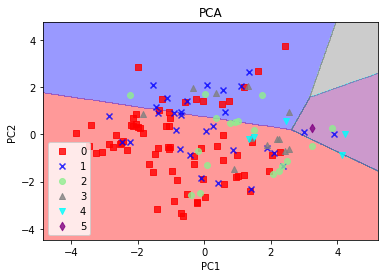

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Test accuracy: 0.4740740740740741


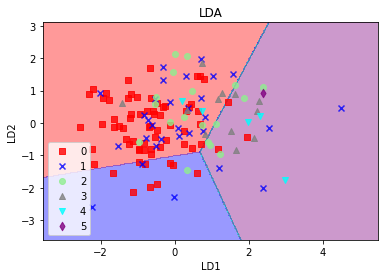

In [ ]:
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0)

ppn.fit(X_test_pca, y_test)
print('Test accuracy:', ppn.score(X_test_pca, y_test))
plot_decision_regions(X_test_pca, y_test, classifier=ppn)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

ppn.fit(X_test_lda, y_test)
print('Test accuracy:', ppn.score(X_test_lda, y_test))
plot_decision_regions(X_test_lda, y_test, classifier=ppn)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

Terlihat bahwa terjadi kenaikan sebesar dua kali lipat jika dibandingkan dengan sebelumnya pada algoritma perceptron ini. Adanya reduksi dimensi ini mungkin mempermudah algorima perceptron dalam mencari bobot yang sesuai sehingga akurasinya pun meningkat.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Test accuracy: 0.5481481481481482


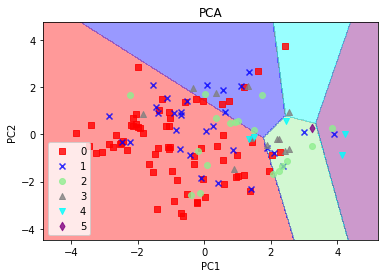

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Test accuracy: 0.5259259259259259


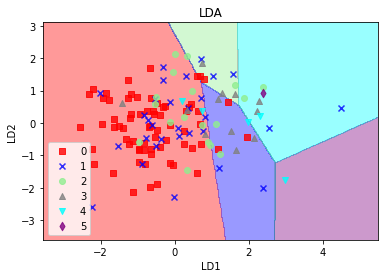

In [ ]:
lr = LogisticRegression()

lr.fit(X_test_pca, y_test)
print('Test accuracy:', lr.score(X_test_pca, y_test))
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

lr.fit(X_test_lda, y_test)
print('Test accuracy:', lr.score(X_test_lda, y_test))
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

Pada algoritma logistic regression, penggunaan LDA dan PCA untuk kasus ini ternyata tidak terlalu berpengaruh. Akurasinya tidak jauh berbeda dari sebelumnya. Namun mungkin jika menggunakan data lain, penggunaan PCA atau LDA akan bisa meningkatkan akuasi algoritma ini.

Test accuracy: 0.5111111111111111


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

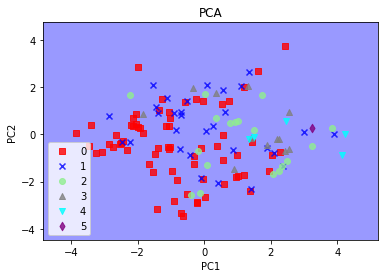

Test accuracy: 0.5111111111111111


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

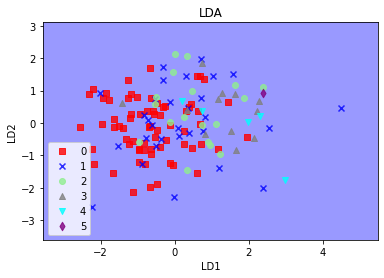

In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=1.0)

svm.fit(X_test_pca, y_test)
print('Test accuracy:', svm.score(X_test_pca, y_test))
plot_decision_regions(X_test_pca, y_test, classifier=svm)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

svm.fit(X_test_lda, y_test)
print('Test accuracy:', svm.score(X_test_lda, y_test))
plot_decision_regions(X_test_lda, y_test, classifier=svm)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

Untuk algoritma SVM juga penggunaan PCA dan LDA untuk kasus ini tidak terlalu berpengaruh. Yang menarik adalah hasil dari PCA dan LDA nya sama, berbeda dengan algortima lainnya dimana hasil PCA biasnaya lebih tinggi daripada LDA.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Test accuracy: 0.6


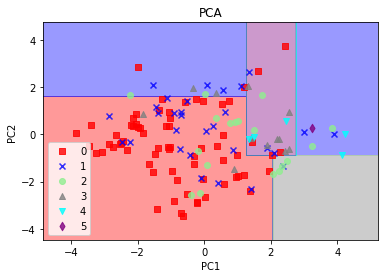

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Test accuracy: 0.6148148148148148


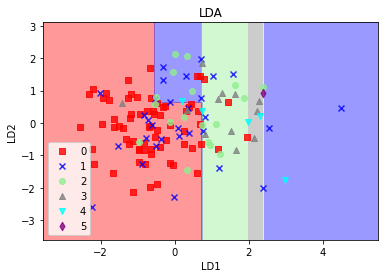

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

tree.fit(X_test_pca, y_test)
print('Test accuracy:', tree.score(X_test_pca, y_test))
plot_decision_regions(X_test_pca, y_test, classifier=tree)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

tree.fit(X_test_lda, y_test)
print('Test accuracy:', tree.score(X_test_lda, y_test))
plot_decision_regions(X_test_lda, y_test, classifier=tree)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

Untuk algoritma decision tree, penggunaan PCA dan LDA ternyata memberikan efek positif dengan menaikkan akurasinya. Walau tidak terlalu tajam, tapi peningkatan ini sangatlah berarti dalam menentukan decision pada tree nya.

Test accuracy: 0.9703703703703703


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

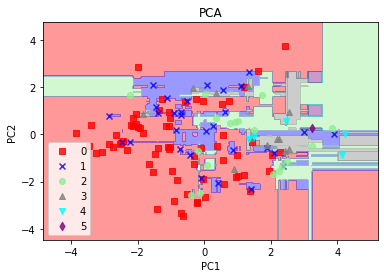

Test accuracy: 0.9629629629629629


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

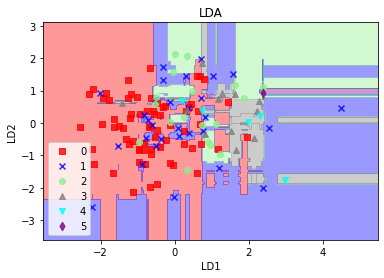

In [ ]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)

forest.fit(X_test_pca, y_test)
print('Test accuracy:', forest.score(X_test_pca, y_test))
plot_decision_regions(X_test_pca, y_test, classifier=forest)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

forest.fit(X_test_lda, y_test)
print('Test accuracy:', forest.score(X_test_lda, y_test))
plot_decision_regions(X_test_lda, y_test, classifier=forest)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

Pada random forest diperoleh hasil yang sangat luar biasa karena akurasinya meningkat tajam hingga lebih dari 95% baik untuk PCA maupun LDA. sebelum digunakan PCA dan LDA, random forest memberikan akurasi yang cukup rendah dibandingkan dengan yang lainnya, namun dengan penggunaan PCA dan LDA diperoleh peningkatan akurasi yang hampir 2x lipat. Hal ini berbanding lurus dengan fakta bahwa PCA dan LDA juga menaikkan akurasi decision tree yang menjadi dasar dari random forest. Pada kasus ini random forest kembali menjadi algoritma yang cukup powerful. Namun, jika diperhatikan lagi, hasil yang diperoleh sangatlah overfitting (walau sudah digunakan untuk melatih data tes) sehingga kurang cocok jika digunakan menjadi strategi data latih.

Test accuracy: 0.6888888888888889


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

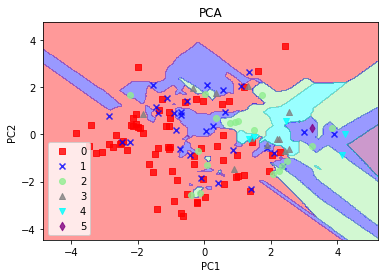

Test accuracy: 0.6962962962962963


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

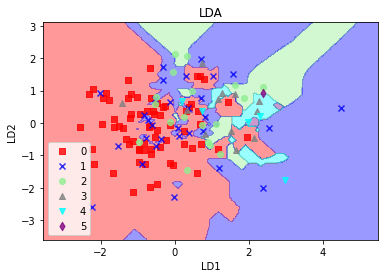

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2, p=7, metric='minkowski')

knn.fit(X_test_pca, y_test)
print('Test accuracy:', knn.score(X_test_pca, y_test))
plot_decision_regions(X_test_pca, y_test, classifier=knn)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

knn.fit(X_test_lda, y_test)
print('Test accuracy:', knn.score(X_test_lda, y_test))
plot_decision_regions(X_test_lda, y_test, classifier=knn)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

Untuk algoritma KNN diperoleh peningkatan akurasi dengan diterapkannya PCA dan LDA. Karena KNN memanfaatkan data-data di sekitar data tertentu untuk menentukan decisionnya, maka dengan reduksi dimensi ini, data akan relatif lebih terpisah ke dalam kelompoknya masing-masing, walau tidak smepurna dalam kasus ini. Hal tersebut tentunya sangat membantu algoritma ini dalam menentukan jenis kelasnya berdasaran kawan-kawan di sekitarnya.